The real estate market in New York is highly dynamic and diverse, with a wide range of property types, prices, and locations. Understanding the key factors that influence property prices and trends is crucial for potential buyers, sellers, and investors. This project aims to analyze the New York housing market to uncover insights and patterns that can inform decision-making.

Objectives of this project:

*   Data cleaning and preparation
*   Exploratory Data Analysis (EDA)
*   Advanced analysis
*   Data visualization

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/sample_data/NY-House-Dataset.csv'
ny_house_data = pd.read_csv(file_path)

ny_house_data.head(2)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.0,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991


In [25]:
ny_house_data.info()
ny_house_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


Checking for any missing values

In [26]:
missing_values = ny_house_data.isnull().sum()
print(missing_values)

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


Looking for NaN values

In [27]:
nan_values = ny_house_data.isna().sum()
print(nan_values)

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


Now, lets check for any duplicates in the dataset

In [28]:
duplicates = ny_house_data.duplicated()
num_duplicates = duplicates.sum()
print("There are: " + str(num_duplicates) + " duplicates in this dataset")

There are: 214 duplicates in this dataset


In [29]:
no_duplicates_df = ny_house_data.drop_duplicates()
print(no_duplicates_df.dtypes)

BROKERTITLE                     object
TYPE                            object
PRICE                            int64
BEDS                             int64
BATH                           float64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object


## Identifying Outliers

<ipython-input-30-3e4a06c13485>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=no_duplicates_df[col], ax=axes[index], palette="Set3")
<ipython-input-30-3e4a06c13485>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=no_duplicates_df[col], ax=axes[index], palette="Set3")
<ipython-input-30-3e4a06c13485>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=no_duplicates_df[col], ax=axes[index], palette="Set3")
<ipython-input-30-3e4a06c13485>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

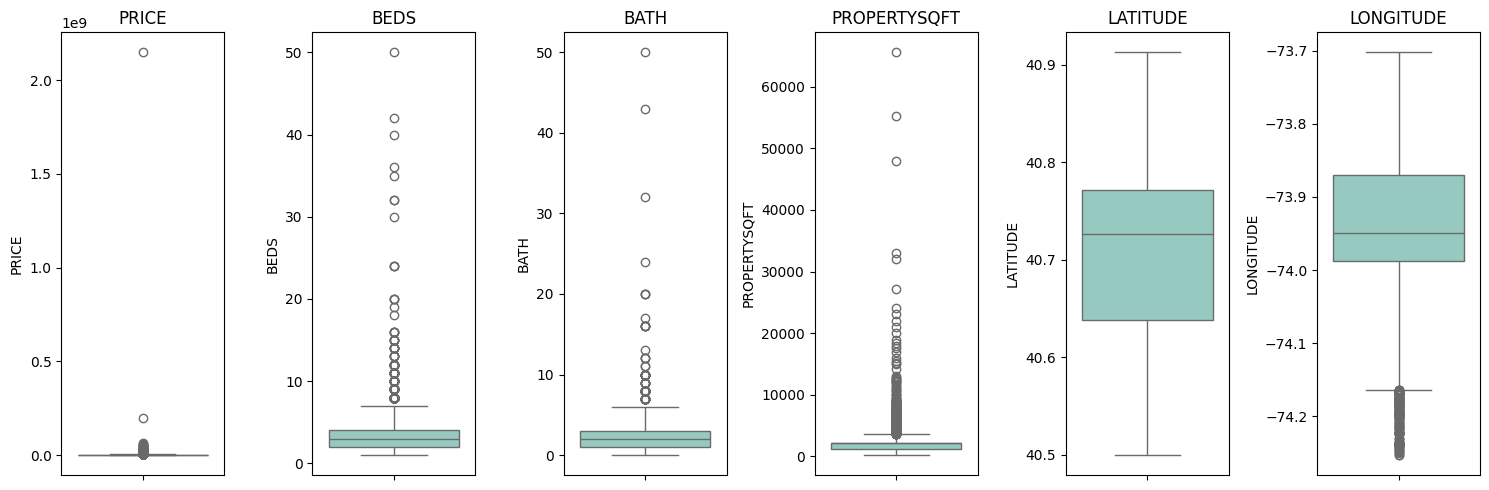

In [30]:
numeric_columns = ["PRICE", "BEDS", "BATH", "PROPERTYSQFT", "LATITUDE", "LONGITUDE"]
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(15,5))

for index, col in enumerate(numeric_columns):
  sns.boxplot(data=no_duplicates_df[col], ax=axes[index], palette="Set3")
  axes[index].set_title(col)

plt.tight_layout()
plt.show()

I will be removing outliers on Price, Beds, Bath and PropertySQFT for a more robust analysis. I will be using the IQR formula.

In [31]:
q1_price = np.percentile(no_duplicates_df["PRICE"], 25)
q3_price = np.percentile(no_duplicates_df["PRICE"], 75)
iqr_price = q3_price - q1_price
mean_price = np.mean(no_duplicates_df["PRICE"])
median_price = np.median(no_duplicates_df["PRICE"])
print(q1_price)
print(q3_price)
print(iqr_price)
print(mean_price)
print(median_price)

499000.0
1498500.0
999500.0
2381171.6823632005
825000.0


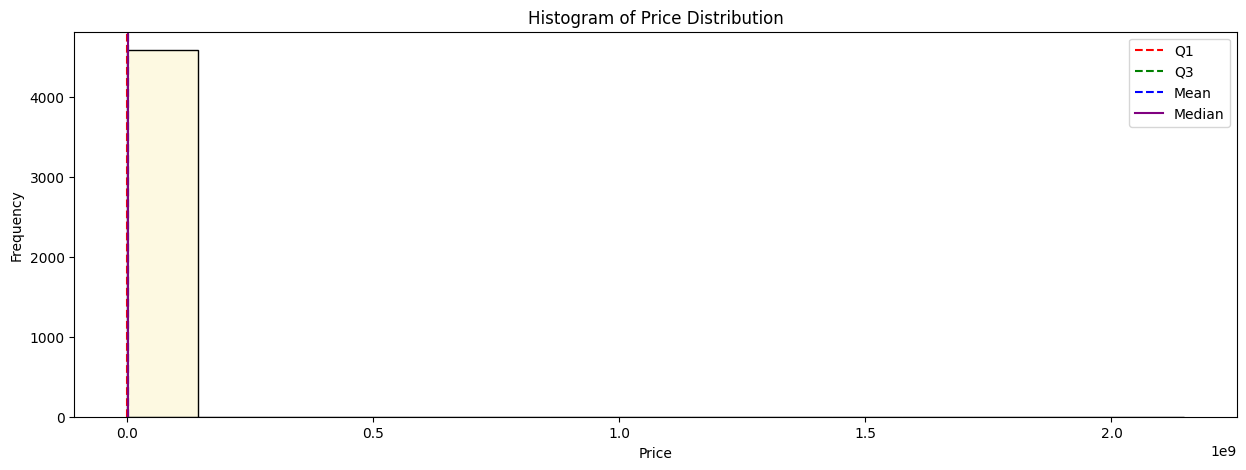

In [32]:
#I need to see first how the data is distributed so i can understand those values:
# Plot a histogram for the 'price' column
plt.figure(figsize=(15, 5))
sns.histplot(data=no_duplicates_df, x='PRICE', bins=15, color='#fdf7d8', edgecolor='black')
plt.axvline(x=q1_price, color='r', linestyle='dashed', linewidth=1.5, label='Q1')  # Q1 line
plt.axvline(x=q3_price, color='g', linestyle='dashed', linewidth=1.5, label='Q3')  # Q3 line
plt.axvline(x=mean_price, color='b', linestyle='dashed', linewidth=1.5, label='Mean')  # Mean line
plt.axvline(x=median_price, color='purple', linestyle='solid', linewidth=1.5, label='Median')  # Median line

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price Distribution')
plt.legend()
plt.show()

Data prices seem to be very skewed to the right, so, we are going ot be applying a log transformation to reduce the skewness

<ipython-input-33-7bf3acf01964>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_duplicates_df['LOG_PRICE'] = np.log1p(no_duplicates_df['PRICE']) # Log transform the PRICE column


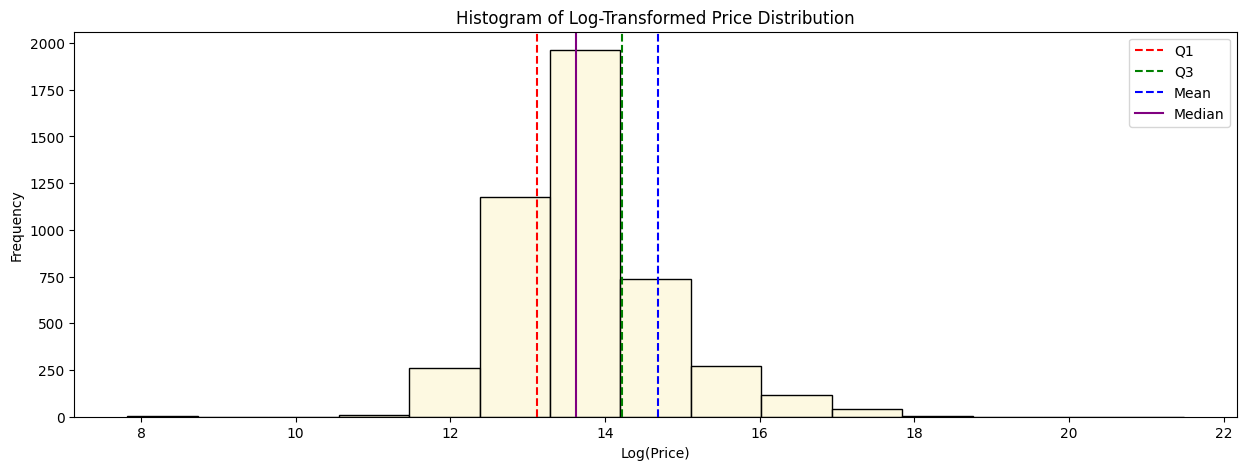

In [33]:
no_duplicates_df['LOG_PRICE'] = np.log1p(no_duplicates_df['PRICE']) # Log transform the PRICE column

# Plot the histogram of the log-transformed prices
plt.figure(figsize=(15, 5))
sns.histplot(data=no_duplicates_df, x='LOG_PRICE', bins=15, color='#fdf7d8', edgecolor='black')

plt.axvline(x=np.log1p(q1_price), color='r', linestyle='dashed', linewidth=1.5, label='Q1')  # Q1 line
plt.axvline(x=np.log1p(q3_price), color='g', linestyle='dashed', linewidth=1.5, label='Q3')  # Q3 line
plt.axvline(x=np.log1p(mean_price), color='b', linestyle='dashed', linewidth=1.5, label='Mean')  # Mean line
plt.axvline(x=np.log1p(median_price), color='purple', linestyle='solid', linewidth=1.5, label='Median')  # Median line

plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Price Distribution')
plt.legend()
plt.show()

In [34]:
#Now I am going to be removing the outliers on the "Price" column.
Q1 = np.percentile(no_duplicates_df["PRICE"], 25)
Q3 = np.percentile(no_duplicates_df["PRICE"], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = no_duplicates_df[(no_duplicates_df['PRICE'] >= lower_bound) & (no_duplicates_df['PRICE'] <= upper_bound)] #here i filter the data and excluded the outliers by stablishing the IQR as a parameter



<ipython-input-35-330687869158>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['LOG_PRICE'] = np.log1p(filtered_df['PRICE'])


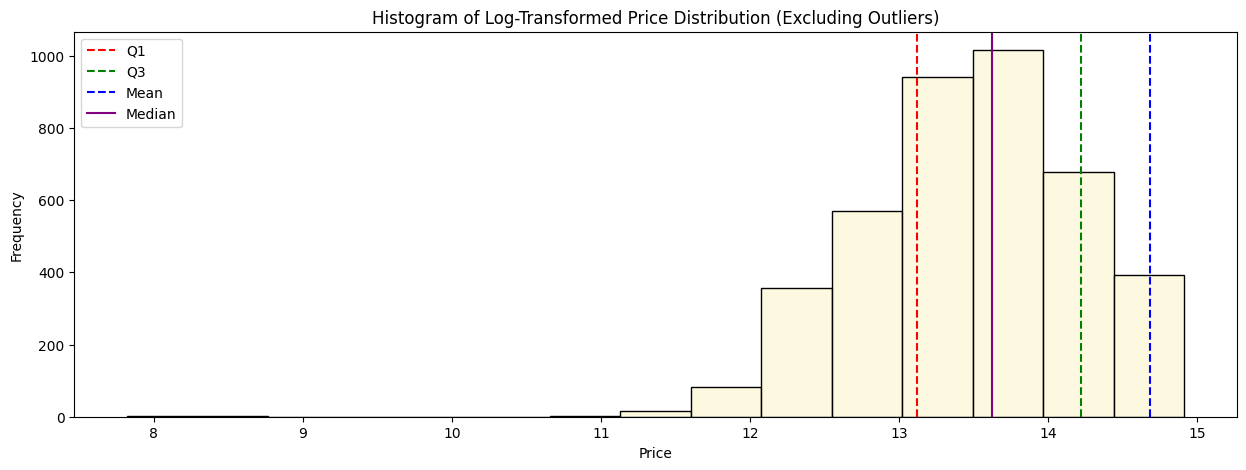

In [35]:
# Log transform the filtered PRICE column
filtered_df['LOG_PRICE'] = np.log1p(filtered_df['PRICE'])

# Plot the histogram of the log-transformed prices without outliers
plt.figure(figsize=(15, 5))
sns.histplot(data=filtered_df, x='LOG_PRICE', bins=15, color='#fdf7d8', edgecolor='black')

plt.axvline(x=np.log1p(Q1), color='r', linestyle='dashed', linewidth=1.5, label='Q1')  # Q1 line
plt.axvline(x=np.log1p(Q3), color='g', linestyle='dashed', linewidth=1.5, label='Q3')  # Q3 line
plt.axvline(x=np.log1p(mean_price), color='b', linestyle='dashed', linewidth=1.5, label='Mean')  # Mean line
plt.axvline(x=np.log1p(median_price), color='purple', linestyle='solid', linewidth=1.5, label='Median')  # Median line

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Price Distribution (Excluding Outliers)')
plt.legend()
plt.show()


## Now, I am going to be doing the same but, with different numeric values. So, the idea is to do EDA on other features.

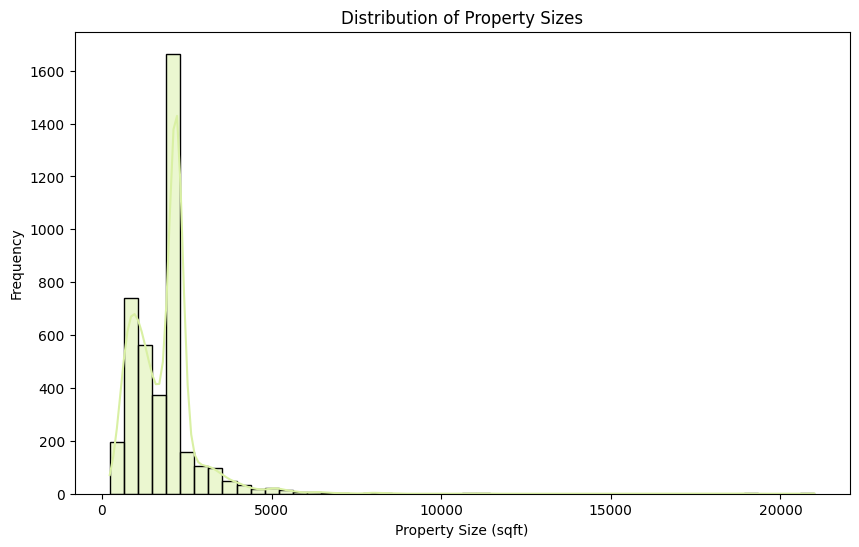

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['PROPERTYSQFT'], bins=50, kde=True, color='#d9f0a3', edgecolor='black')
plt.title('Distribution of Property Sizes')
plt.xlabel('Property Size (sqft)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-37-93f03b495d5a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BEDS', data=filtered_df, palette='Set3')


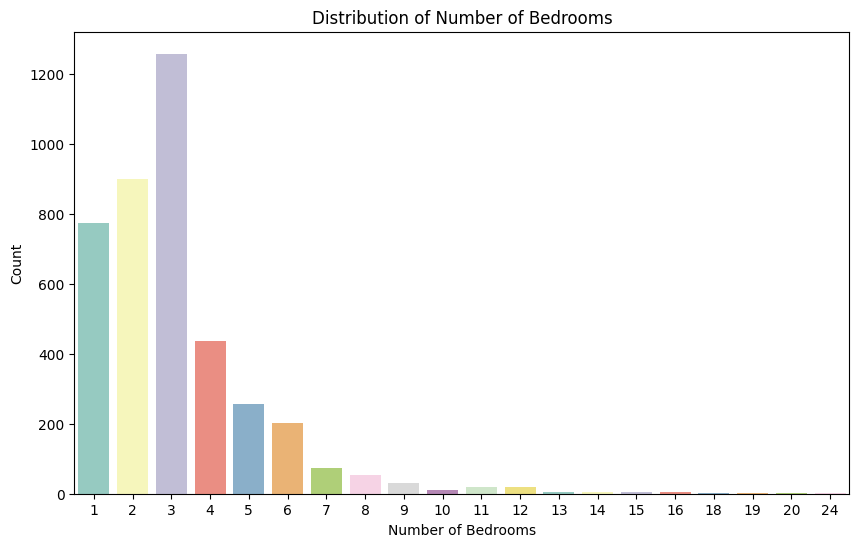

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BEDS', data=filtered_df, palette='Set3')
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()


<ipython-input-38-77c09fb034a9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BATH', data=filtered_df, palette='Set3')


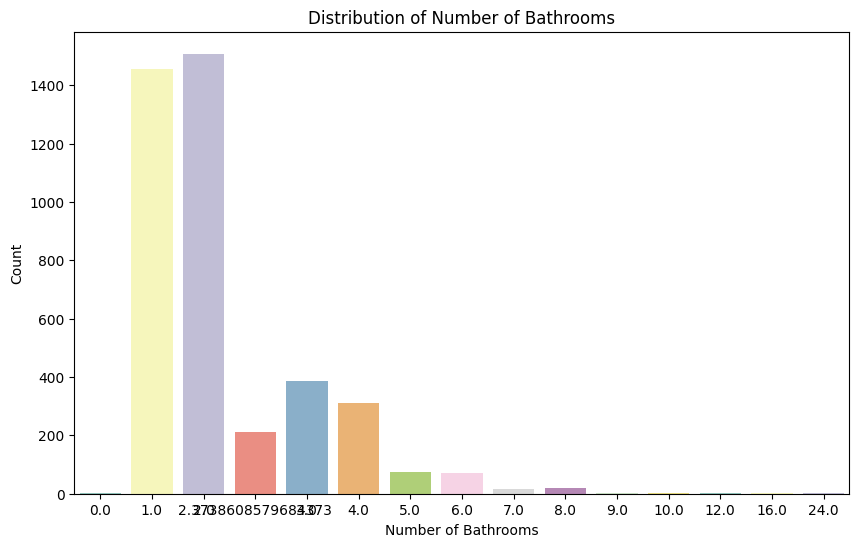

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BATH', data=filtered_df, palette='Set3')
plt.title('Distribution of Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()


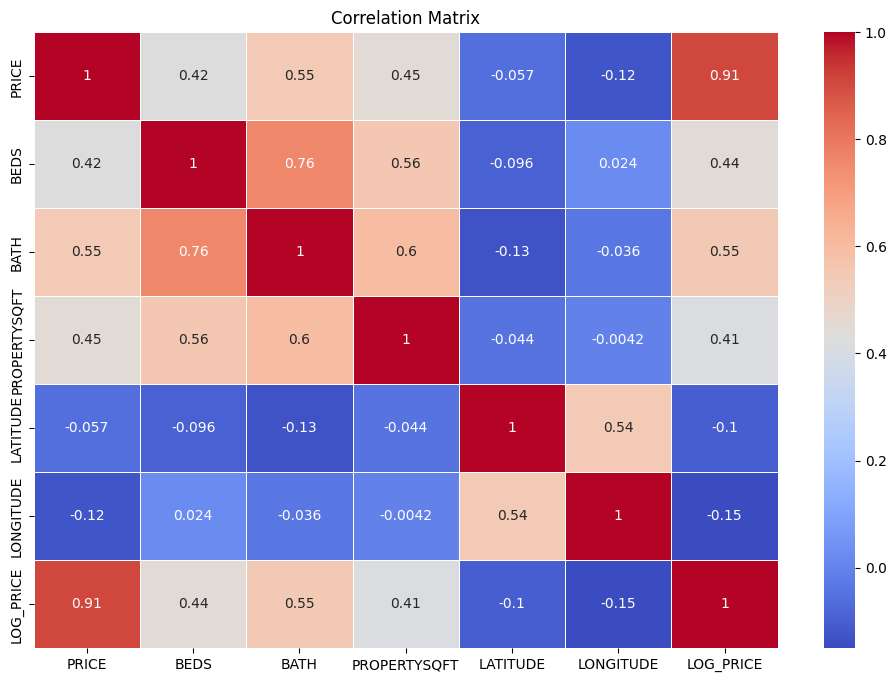

In [39]:

numeric_df = filtered_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## I just realized that I had the original "PRICE" column and the "LOG_PRICE" column on the heatmap. Since the "PRICE" column was manipulated using a log transformation and outliers removal, we want to keep the column result which is "LOG_PRICE" and also, we are going to rename it!

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE', 'LOG_PRICE'],
      dtype='object')


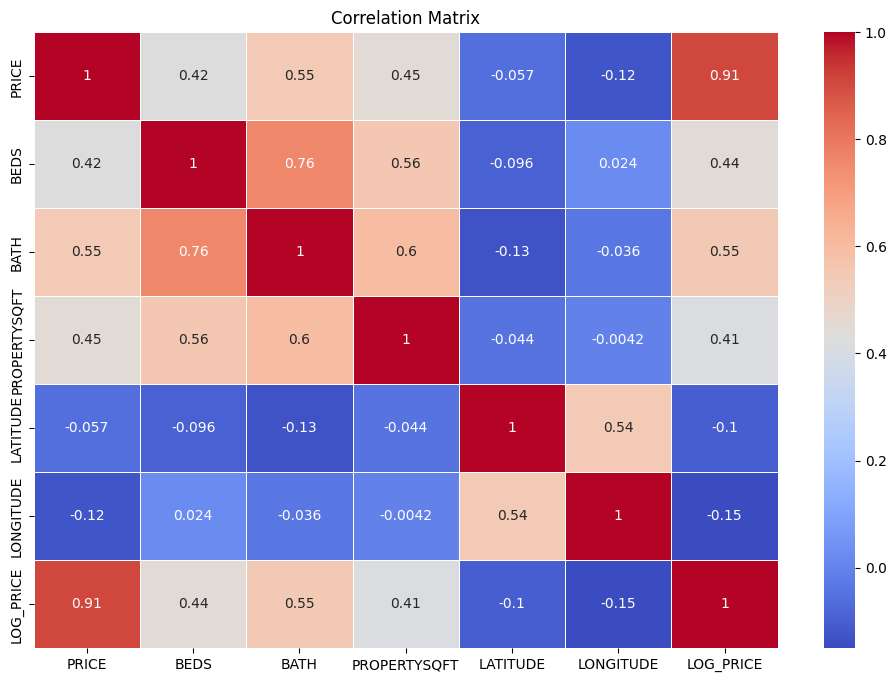

In [40]:
print(filtered_df.columns)
filtered_df = filtered_df.rename(columns={'LOG_PRICE_SQFT': 'PRICE'})
numeric_df = filtered_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Ok, now, I want to see some relationships between variables, in this case the variables PROPERTYSQFT and PRICE are continous variables, so for that, I will be using a scatterplot to do this!

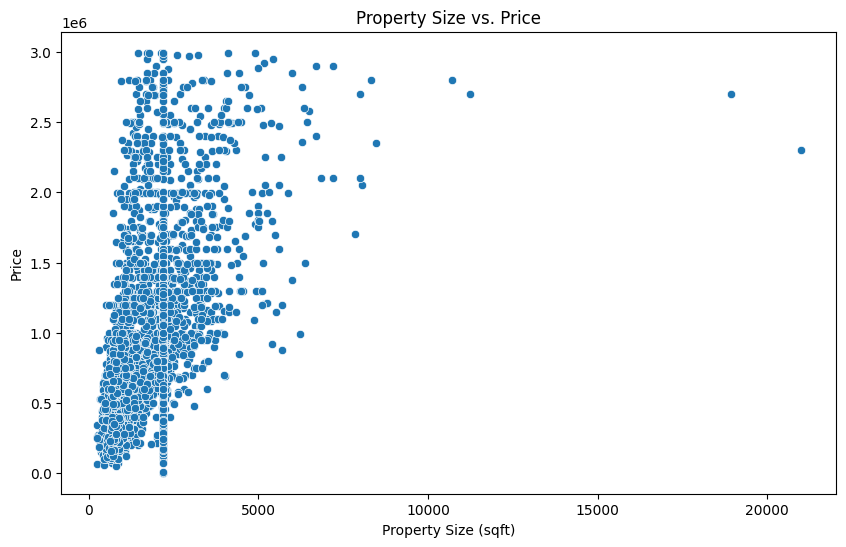

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=filtered_df)
plt.title('Property Size vs. Price')
plt.xlabel('Property Size (sqft)')
plt.ylabel('Price')
plt.show()


this scatterplot shows a clear relationship between property size and price. we can see that ass the size of the property increases, the price increases too. However, there are some exceptions where properties of similar sizes have a wide range of prices, likely due to other factors like location or amenities.

We also see that larger properties are less common. This positive correlation helps us understand that while size is a significant factor, it's not the only one influencing property prices.

## Now, I will be using Boxplots to see relationships. I chose to use Boxplots because i can see the relationships in thsi case with categorical variables and a continuos variable.

<ipython-input-42-a87ed7aa3a78>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BEDS', y='PRICE', data=filtered_df, palette="Set3")


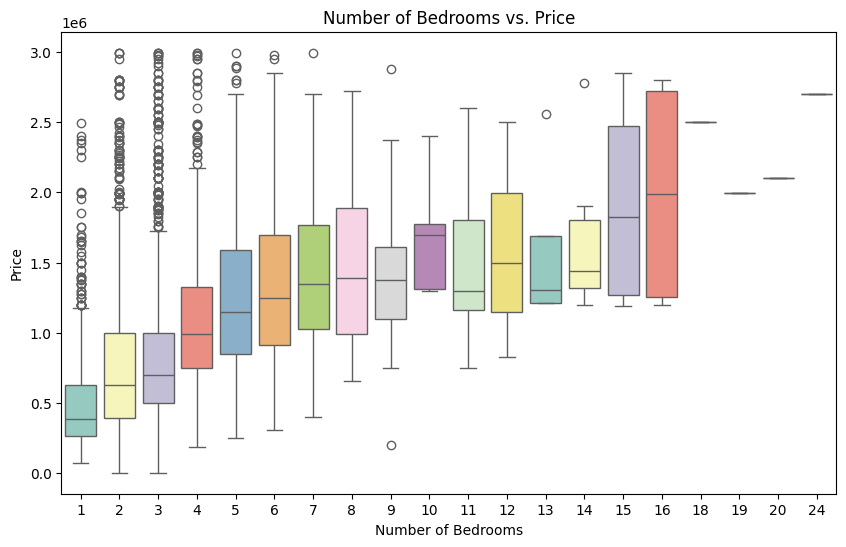

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BEDS', y='PRICE', data=filtered_df, palette="Set3")
plt.title('Number of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()


On the box plot above we are comparing the number of bedrooms to price reveals that properties with more bedrooms tend to be more expensive. Each category shows a wide range of prices, especially for homes with 3 and 4 bedrooms, indicating other factors at play.

We can also see some outliers, that is, we can see properties that are priced higher and others lower than the average house, so, we can see some diversity in the NY house market!


<ipython-input-43-92c860a6c30f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BATH', y='PRICE', data=filtered_df, palette="Set3")


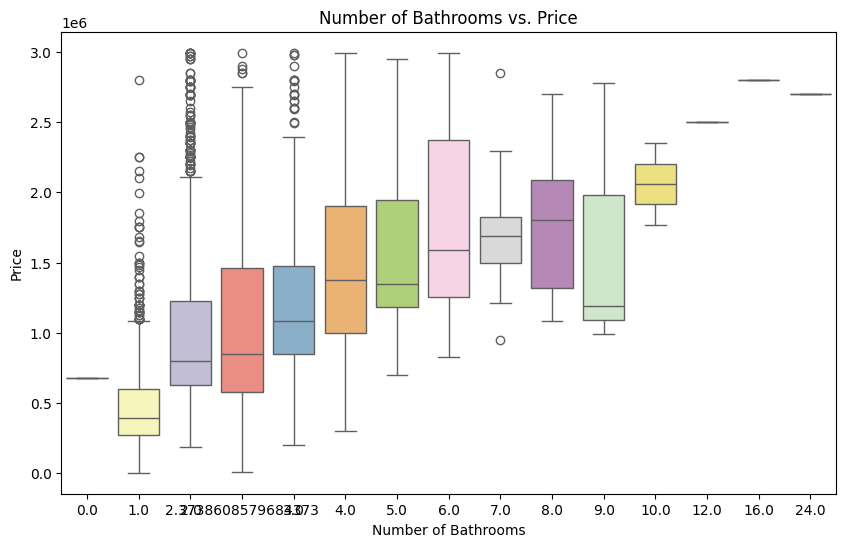

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BATH', y='PRICE', data=filtered_df, palette="Set3")
plt.title('Number of Bathrooms vs. Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()


Similar to the previos box plot the properties with more bathrooms tend to have higher prices. Specially, the properties that have between 2 to 4 bathrooms

R-squared: 0.28416036525165767


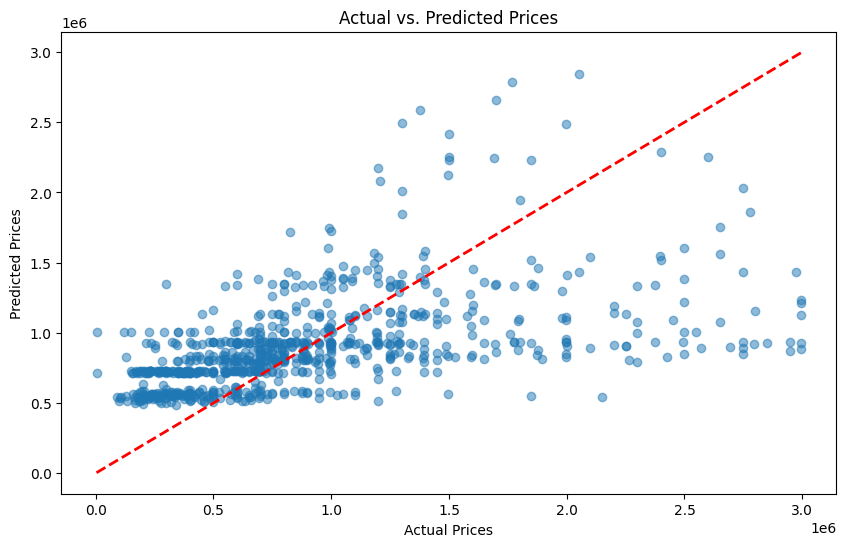

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


X = filtered_df[['PROPERTYSQFT', 'BEDS', 'BATH']]
y = filtered_df['PRICE']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()


The r2 value is approximately 0.278. So, that means that the r2 is 27.8% and that number represent the variance in the actual prices

Since this is not a very high number, i think that we can still improve our model.

Now, when it comes to the MAE, this is a representation of the Error Margin we have with this model, the closer to 0, the better. In this case is 0.46 units, which is great.

## Now, lets transform our data into a CSV file.


In [45]:
filtered_df.to_csv('NY-House-Dataset-Cleaned.csv', index=False)

In [46]:
from google.colab import files

files.download('NY-House-Dataset-Cleaned.csv') #this is the way to download a file from the Google colab enviroment


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>